# CPU Scheduling

In [64]:
# pip install pandas numpy matplotlib

In [65]:
import pandas as df
import numpy as np
import matplotlib.pyplot as plt

## Multilevel Queue Scheduler (MLQ)

In [66]:
algo1 = "mlq"

In [67]:
df1_metrics = df.read_csv(f"{algo1}_metrics.csv")
df1_timeline = df.read_csv(f"{algo1}_timeline.csv")

In [68]:
display(df1_timeline.head())

,Time,Process
0,0,P1
1,1,P1
2,2,P2
3,3,P2
4,4,P2


In [69]:
display(df1_metrics.head())

,Process ID,Arrival,Burst,Priority,Start Time,Finish Time,Waiting Time,Turnaround Time,Response Time
0,P1,0,2,1,0,2,0,2,0
1,P2,2,4,2,2,6,0,4,0
2,P3,4,6,3,6,14,4,10,2
3,P4,6,8,4,14,24,10,18,8
4,P5,8,10,5,24,36,18,28,16


In [70]:
metrics1 = df1_metrics.columns[-3:]  
averages1 = df1_metrics[metrics1].mean()
print("Average Metrics:")
print(averages1)

Average Metrics:
Waiting Time       187.86
Turnaround Time    193.86
Response Time      158.18
dtype: float64


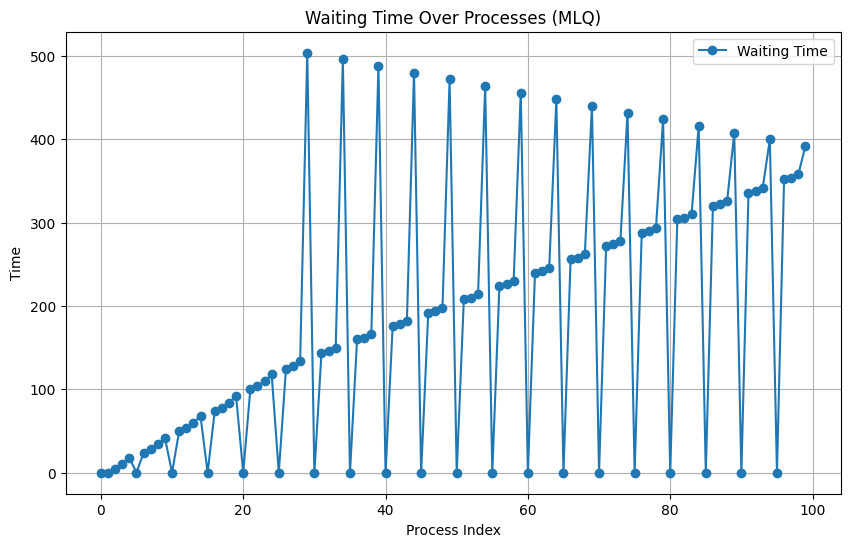

In [71]:
idx=0
plt.figure(figsize=(10, 6))
plt.plot(df1_metrics[metrics1[idx]], marker='o', label=metrics1[idx])
plt.title(f'{metrics1[idx]} Over Processes (MLQ)')
plt.xlabel('Process Index')
plt.ylabel('Time')
plt.legend()
plt.grid()
plt.show()

## Multilevel Feedback Queue Scheduler (MLQ)

In [72]:
algo2 = "mlfq"

In [73]:
df2_metrics = df.read_csv(f"{algo2}_metrics.csv")
df2_timeline = df.read_csv(f"{algo2}_timeline.csv")

In [74]:
display(df1_timeline.head())

,Time,Process
0,0,P1
1,1,P1
2,2,P2
3,3,P2
4,4,P2


In [75]:
display(df2_metrics.head())

,Process ID,Arrival,Burst,Priority,Start Time,Finish Time,Waiting Time,Turnaround Time,Response Time
0,P1,0,2,1,0,2,0,2,0
1,P2,2,4,2,2,6,0,4,0
2,P3,4,6,3,6,14,4,10,2
3,P4,6,8,4,30,38,24,32,24
4,P5,8,10,5,38,74,56,66,30


In [76]:
metrics2 = df2_metrics.columns[-3:]
averages2 = df2_metrics[metrics2].mean()
print("Average Metrics:")
print(averages2)

Average Metrics:
Waiting Time       210.28
Turnaround Time    216.28
Response Time      174.90
dtype: float64


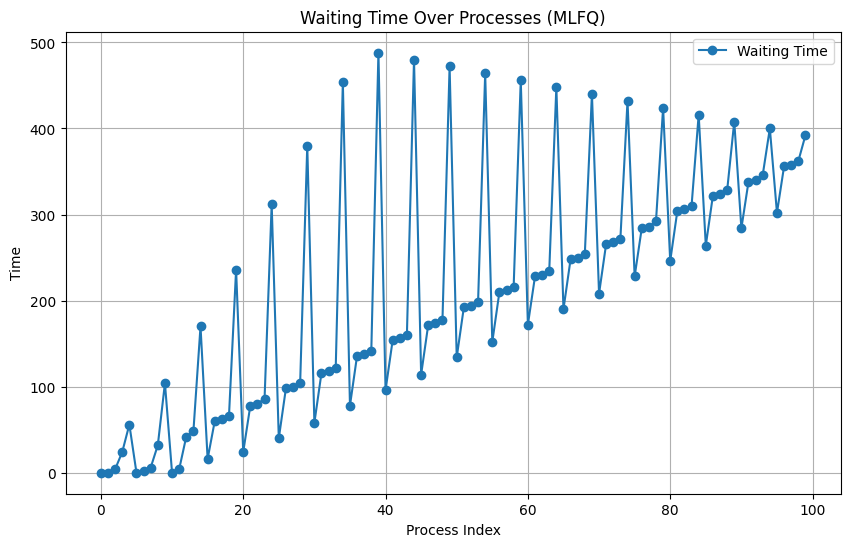

In [77]:
idx=0
plt.figure(figsize=(10, 6))
plt.plot(df2_metrics[metrics2[idx]], marker='o', label=metrics2[idx])
plt.title(f'{metrics2[idx]} Over Processes (MLFQ)')
plt.xlabel('Process Index')
plt.ylabel('Time')
plt.legend()
plt.grid()
plt.show()

## Comparative Analysis

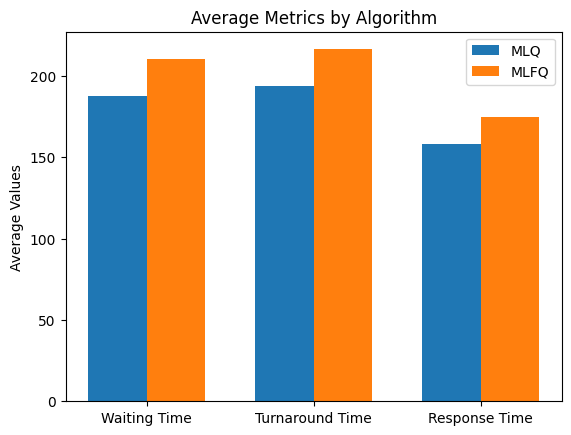

In [78]:
labels = metrics1
mlq_means = averages1.values
mlfq_means = averages2.values
x = np.arange(len(labels))  
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mlq_means, width, label='MLQ')
rects2 = ax.bar(x + width/2, mlfq_means, width, label='MLFQ')
ax.set_ylabel('Average Values')
ax.set_title('Average Metrics by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [79]:
diferences = mlfq_means - mlq_means
print("Diferences between MLQ and MLFQ:")
for label, diff in zip(labels, diferences):
    print(f"{label}: {diff:.2f}")

Diferences between MLQ and MLFQ:
Waiting Time: 22.42
Turnaround Time: 22.42
Response Time: 16.72


In [80]:
# pip freeze > requirements.txt